<a href="https://colab.research.google.com/github/iceman67/HRS/blob/master/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/understanding-anomaly-detection-in-python-using-gaussian-mixture-model-e26e5d06094b

Anomaly Detection in Python with Gaussian Mixture Models

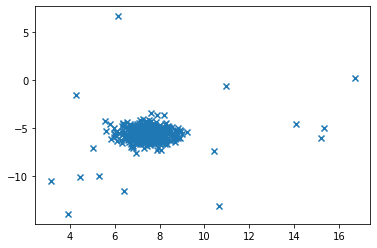

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=1, cluster_std=0.60, random_state=5)
X_append, y_true_append = make_blobs(n_samples=20,centers=1, cluster_std=5,random_state=5)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1] 
plt.scatter(X[:,0],X[:,1],marker="x")
plt.show()

In [ ]:
def estimateGaussian(X):
    m = X.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    # compute variance of X
    var = np.var(X,axis=0)
    print(mu, var)
    return mu,var

In [ ]:
mu, var = estimateGaussian(X)

[ 7.47238448 -5.56412287] [1.01680768 1.22046707]


In [ ]:
def multivariateGaussian(X, mu, sigma):
    k = len(mu)
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p

In [ ]:
p = multivariateGaussian(X, mu, var)

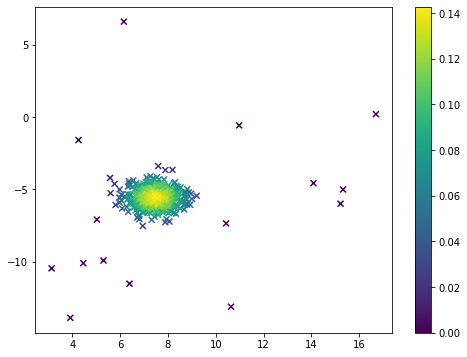

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
plt.colorbar();

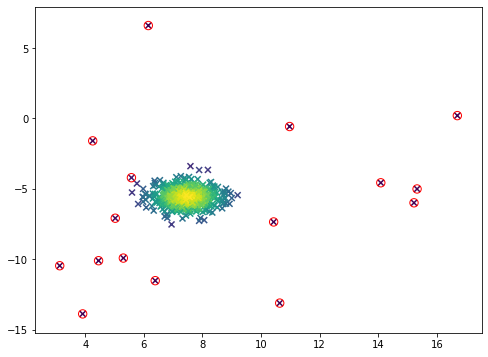

In [ ]:
epsilon=0.02 

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

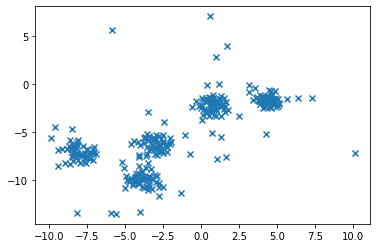

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
X, y_true = make_blobs(n_samples=400, centers=5, cluster_std=0.60, random_state=1)
X_append, y_true_append = make_blobs(n_samples=50,centers=5, cluster_std=5,random_state=1)
X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=1, shuffle=True)
plt.scatter(X_train[:,0],X_train[:,1],marker="x");

[-1.83507767 -5.34263936] [18.71750414 12.12645659]


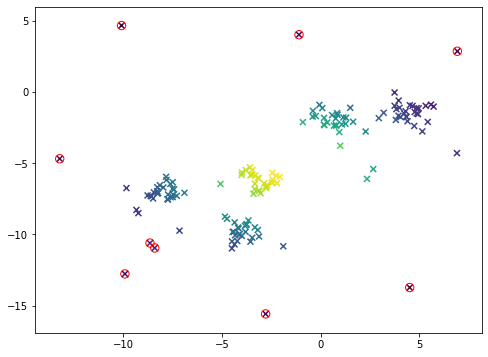

In [ ]:
mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],marker="x",c=p,cmap='viridis');
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, label = make_blobs(100, centers = 1)

#### Z-score

In [ ]:
from scipy.stats import zscore
import pandas as pd
zscore_X  = zscore(X)

df = pd.DataFrame(zscore_X, columns =['X', 'X_zscore'])
df["is_outlier"]  = df['X_zscore'].apply (
 lambda x: x <= -1.5 or x >= 1.5 )

print (df[df["is_outlier"]])

           X  X_zscore  is_outlier
2  -0.670658 -1.851580        True
14  1.481434 -1.539940        True
27 -0.335045 -1.762037        True
30 -1.444887 -1.642611        True
31  1.195489 -1.772793        True
35 -1.001438  1.753167        True
40 -2.769893 -1.530777        True
47  1.531924  1.513900        True
54  1.080121 -1.603861        True
58 -0.261854  1.646284        True
68  2.088916 -2.541546        True
73 -1.177361  2.430745        True
76  1.101912 -1.554699        True
80  0.432385  1.749195        True
86  0.048084  2.120565        True


#### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(X)

print (clusters)


[ 0  0  0  0 -1  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  2  0  0  0 -1 -1  0  0  1 -1  0  0  0  0  0  0  1
  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  2
  0 -1  0  0  2  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0  0
 -1  0  0 -1]


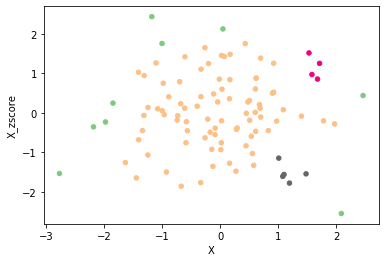

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
df.plot.scatter(
  x = "X",
  y = "X_zscore",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

#### K-Means

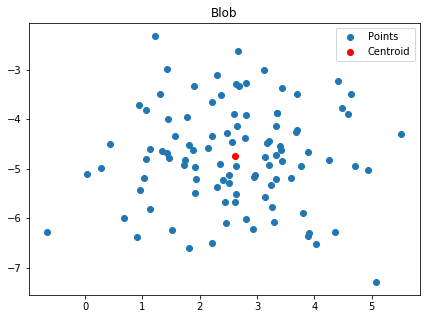

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1)

kmeans.fit(X)

f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Blob')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1], label='Centroid',
           color='r')
ax.legend(loc='best')

plt.show()

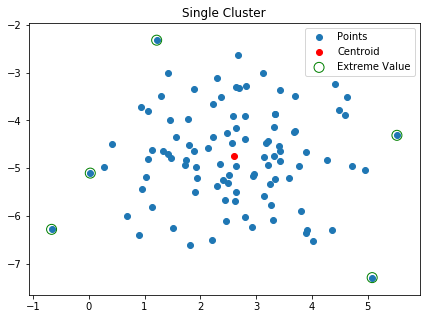

In [ ]:
distances = kmeans.transform(X)

sorted_idx = np.argsort(distances.ravel())[::-1][:5]

f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Centroid', color='r')
ax.scatter(X[sorted_idx][:, 0],
           X[sorted_idx][:, 1],
           label='Extreme Value', edgecolors='g',
           facecolors='none', s=100)
ax.legend(loc='best')

plt.show()


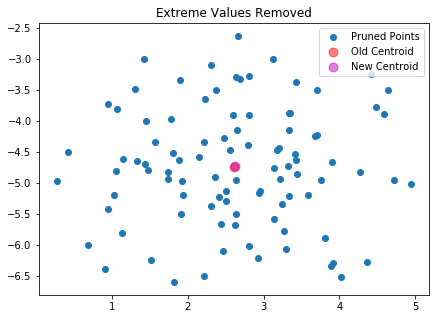

In [ ]:
# simulating removing these outliers
new_X = np.delete(X, sorted_idx, axis=0)

# this causes the centroids to move slightly
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)


f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Extreme Values Removed")
ax.scatter(new_X[:, 0], new_X[:, 1], label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           label='Old Centroid',
           color='r', s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:, 0],
           new_kmeans.cluster_centers_[:, 1],
           label='New Centroid',
           color='m', s=80, alpha=.5)
ax.legend(loc='best')

In [ ]:
from scipy import stats
emp_dist = stats.multivariate_normal(kmeans.cluster_centers_.ravel())
lowest_prob_idx = np.argsort(emp_dist.pdf(X))[:5]
np.all(X[sorted_idx] == X[lowest_prob_idx])



print ( kmeans.cluster_centers_)
print (kmeans.cluster_centers_.ravel())

[[ 2.6085125  -4.74826759]]
[ 2.6085125  -4.74826759]
